# **Seção de Importação**

In [1]:
#baixando o dataset de treino
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

--2022-12-29 12:31:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.1.208, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   209MB/s    in 0.7s    

2022-12-29 12:31:28 (209 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
#baixando o dataset de teste
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip  -O /tmp/validation-horse-or-human.zip

--2022-12-29 12:31:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.1.208, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2022-12-29 12:31:33 (92.0 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import os
import zipfile

#extraindo o zip

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [4]:
#extraindo os arquivos para validação

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [5]:
#Diretorio com as imagens de treino de cavalos
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')


 
#Diretorio com as imagens de treino de humanos
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [6]:
#Diretorio para os arquivos da validação

test_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
test_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

# **Seção de Visualização de dados**

In [7]:
#nomes dos arquivos
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse14-3.png', 'horse10-3.png', 'horse39-9.png', 'horse22-7.png', 'horse21-7.png', 'horse17-6.png', 'horse45-3.png', 'horse38-5.png', 'horse22-5.png', 'horse14-7.png']
['human14-05.png', 'human10-28.png', 'human02-13.png', 'human06-25.png', 'human16-08.png', 'human11-13.png', 'human01-08.png', 'human17-22.png', 'human12-24.png', 'human04-10.png']


In [8]:
test_horse_names = os.listdir(test_horse_dir)
print(test_horse_names[:10])
test_human_names = os.listdir(test_human_dir)
print(test_human_names[:10])

['horse2-368.png', 'horse4-439.png', 'horse5-103.png', 'horse3-055.png', 'horse2-441.png', 'horse2-201.png', 'horse6-218.png', 'horse5-519.png', 'horse1-105.png', 'horse3-584.png']
['valhuman04-15.png', 'valhuman03-16.png', 'valhuman05-05.png', 'valhuman03-23.png', 'valhuman03-18.png', 'valhuman02-16.png', 'valhuman03-20.png', 'valhuman04-17.png', 'valhuman05-12.png', 'valhuman05-24.png']


In [9]:
#total de imagens
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [10]:
print('total training horse images:', len(os.listdir(test_horse_dir)))
print('total training human images:', len(os.listdir(test_human_dir)))

total training horse images: 128
total training human images: 128


In [11]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
#Parametros para o nosso gráfico
nrows = 4
ncols = 4
 

pic_index = 0

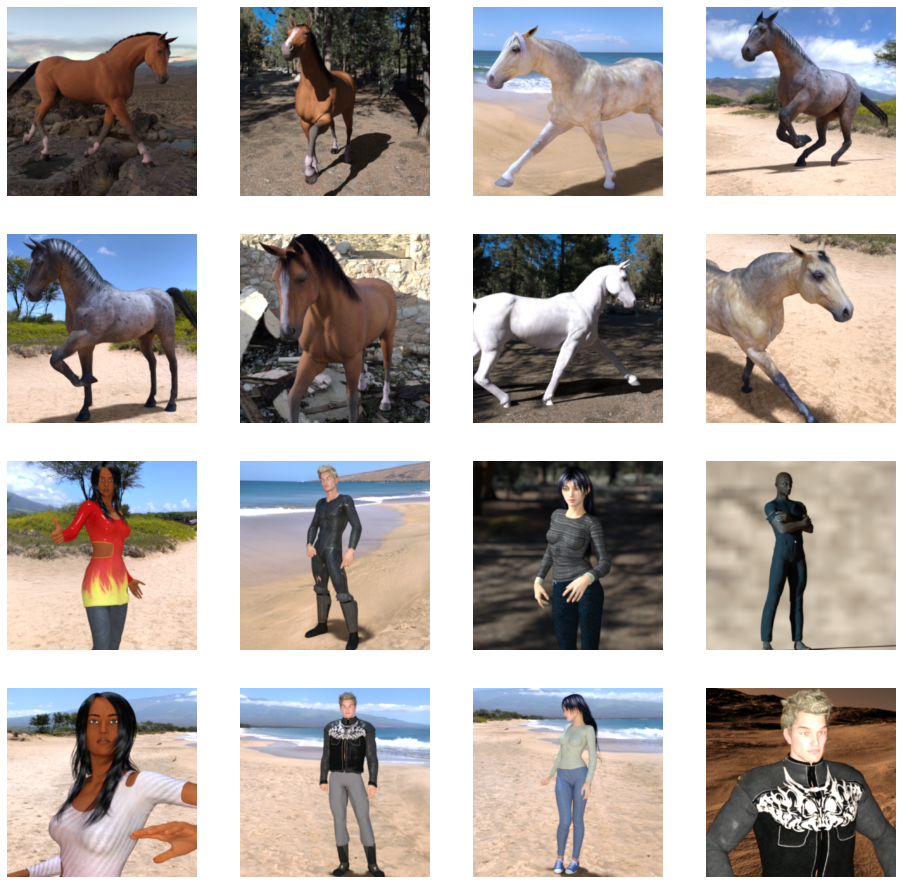

In [12]:
#Criação do gráfico
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()

# **Seção de Treinamento**

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.models.Sequential([

    # Primeira convolução
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Segunda convolução
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Terceira convolução
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Quarta convolução
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Quinta convolução
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Usamos apenas um neurônio como saída, sendo 0 para cavalos e 1 para humanos
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [17]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),  
        batch_size=128,
        
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [19]:
epochs_hist = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=30,
      verbose=1)

Epoch 1/30
8/8 [==============================] - 54s 6s/step - loss: 0.8775 - accuracy: 0.5239
Epoch 2/30
8/8 [==============================] - 50s 6s/step - loss: 0.8182 - accuracy: 0.6696
Epoch 3/30
8/8 [==============================] - 50s 6s/step - loss: 0.6299 - accuracy: 0.6340
Epoch 4/30
8/8 [==============================] - 54s 7s/step - loss: 0.4468 - accuracy: 0.8187
Epoch 5/30
8/8 [==============================] - 50s 7s/step - loss: 0.5260 - accuracy: 0.7820
Epoch 6/30
8/8 [==============================] - 51s 6s/step - loss: 0.3180 - accuracy: 0.8632
Epoch 7/30
8/8 [==============================] - 50s 6s/step - loss: 0.4668 - accuracy: 0.8776
Epoch 8/30
8/8 [==============================] - 50s 6s/step - loss: 0.2095 - accuracy: 0.9166
Epoch 9/30
8/8 [==============================] - 58s 7s/step - loss: 0.1645 - accuracy: 0.9355
Epoch 10/30
8/8 [==============================] - 51s 6s/step - loss: 0.2268 - accuracy: 0.9143
Epoch 11/30
8/8 [======================

# **Seção de Teste e Validação**

In [20]:
import numpy as np
from keras.preprocessing import image

#uma função para testar o nosso dataset de testes
def pred_human_horse(model, horse_or_human):
  test_image = tf.keras.utils.load_img(horse_or_human, target_size = (300, 300))
  test_image = tf.keras.utils.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(horse_or_human,"--->", result)

  if result>0.5:
    print('Predicted>>> Human')
  else:
    print('Predicted>>> Horse')

In [21]:
import os

#Teste com cavalos
lista_val = [os.path.join(test_horse_dir, nome) for nome in os.listdir(test_horse_dir)]

for horse_or_human in lista_val:
  pred_human_horse(model, horse_or_human)

1/1 [==============================] - 0s 376ms/step
/tmp/validation-horse-or-human/horses/horse2-368.png ---> [[0.]]
Predicted>>> Horse
1/1 [==============================] - 0s 30ms/step
/tmp/validation-horse-or-human/horses/horse4-439.png ---> [[0.]]
Predicted>>> Horse
1/1 [==============================] - 0s 42ms/step
/tmp/validation-horse-or-human/horses/horse5-103.png ---> [[0.999]]
Predicted>>> Human
1/1 [==============================] - 0s 29ms/step
/tmp/validation-horse-or-human/horses/horse3-055.png ---> [[0.]]
Predicted>>> Horse
1/1 [==============================] - 0s 34ms/step
/tmp/validation-horse-or-human/horses/horse2-441.png ---> [[0.]]
Predicted>>> Horse
1/1 [==============================] - 0s 33ms/step
/tmp/validation-horse-or-human/horses/horse2-201.png ---> [[0.995]]
Predicted>>> Human
1/1 [==============================] - 0s 34ms/step
/tmp/validation-horse-or-human/horses/horse6-218.png ---> [[0.]]
Predicted>>> Horse
1/1 [==============================] - 0s

In [22]:
#Teste com humanos
lista_val = [os.path.join(test_human_dir, nome) for nome in os.listdir(test_human_dir)]

for horse_or_human in lista_val:
  pred_human_horse(model, horse_or_human)

1/1 [==============================] - 0s 45ms/step
/tmp/validation-horse-or-human/humans/valhuman04-15.png ---> [[1.]]
Predicted>>> Human
1/1 [==============================] - 0s 53ms/step
/tmp/validation-horse-or-human/humans/valhuman03-16.png ---> [[1.]]
Predicted>>> Human
1/1 [==============================] - 0s 53ms/step
/tmp/validation-horse-or-human/humans/valhuman05-05.png ---> [[1.]]
Predicted>>> Human
1/1 [==============================] - 0s 46ms/step
/tmp/validation-horse-or-human/humans/valhuman03-23.png ---> [[0.]]
Predicted>>> Horse
1/1 [==============================] - 0s 41ms/step
/tmp/validation-horse-or-human/humans/valhuman03-18.png ---> [[1.]]
Predicted>>> Human
1/1 [==============================] - 0s 47ms/step
/tmp/validation-horse-or-human/humans/valhuman02-16.png ---> [[1.]]
Predicted>>> Human
1/1 [==============================] - 0s 66ms/step
/tmp/validation-horse-or-human/humans/valhuman03-20.png ---> [[1.]]
Predicted>>> Human
1/1 [======================

# **Seção de Gráfico e Métricas de Desempenho**

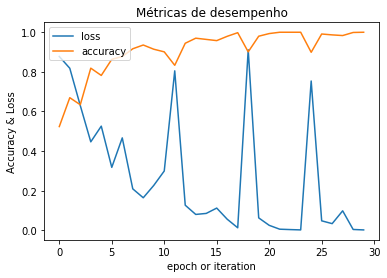

In [23]:
import pandas as pd

history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();
history_df['accuracy'].plot();

plt.title('Métricas de desempenho')
plt.ylabel('Accuracy & Loss')
plt.xlabel('epoch or iteration')
plt.legend(["loss", 'accuracy'], loc = 'upper left')
plt.show()

# **Seção de Visualização das Camadas/Layers**

1/1 [==============================] - 0s 167ms/step


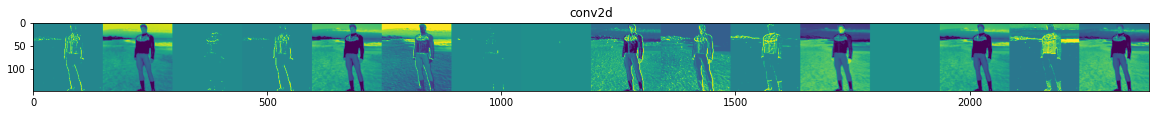

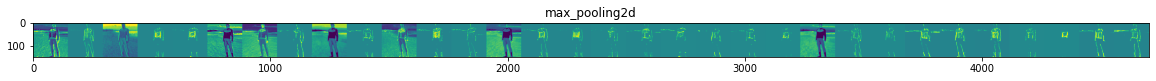

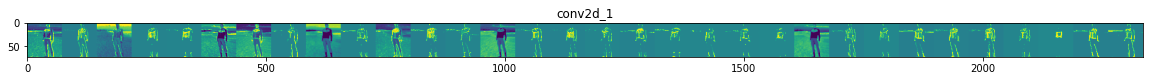

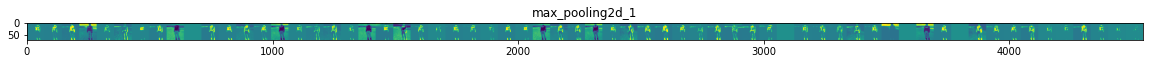

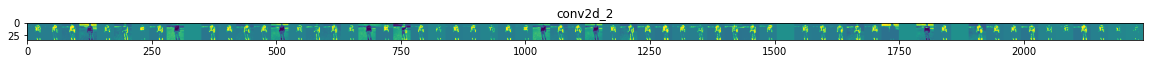

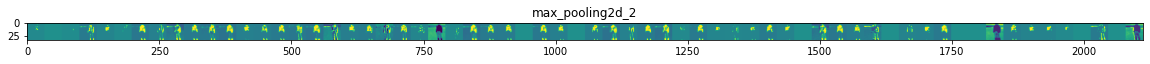

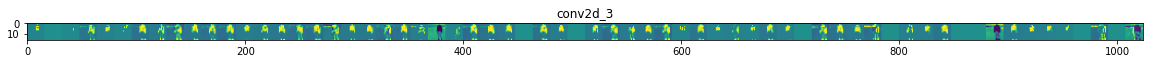

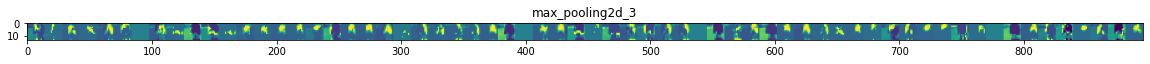

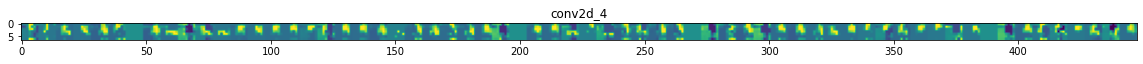

In [24]:
#Visualização das layers

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
 

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
 
img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
 

x /= 255
 

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
 

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]  
    
    size = feature_map.shape[1]
    
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      
      display_grid[:, i * size : (i + 1) * size] = x
    
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# **Seção de Reconhecer um novo exemplo**

In [39]:
#teste passando um arquivo 
import keras
import tensorflow as tf
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = '/content/' + fn
  img = load_img(path, target_size=(300,300))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
     

Saving caracteristicas-cavalos-saudaveis-artigos-cursos-cpt.jpg to caracteristicas-cavalos-saudaveis-artigos-cursos-cpt (11).jpg
1/1 [==============================] - 0s 32ms/step
[0.]
caracteristicas-cavalos-saudaveis-artigos-cursos-cpt.jpg is a horse
